In [8]:
# import nltk
# nltk.download('vader_lexicon')
# import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/apple2015/nltk_data...


In [21]:
#load the quotes stash
quotes = pd.read_csv('data/quote_stash.csv')
# quotes = quotes[['quote','author']]
print(quotes.shape)

quotes.head()

(108, 2)


,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [2]:
quotes.head()

,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [5]:
quotes = quotes.drop_duplicates(subset='author', keep='last')

In [6]:
quotes.head()

,quote,author
0,"Pain is inevitable, but misery is optional.",Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Captain Willard
4,Nobody can make you feel inferior without your...,Eleanor Roosevelt


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia =  SentimentIntensityAnalyzer()

In [12]:
# Example
quote = "The only limit to our realization of tomorrow is our doubts of today."

sentiment = sia.polarity_scores(quote)

In [13]:
print(sentiment)
# Output: {'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.4404}


{'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'compound': -0.296}


In [24]:
#function to get sentiment labels
def get_sentiment_label(quote_v):
    sentiment = sia.polarity_scores(quote_v)
    compound = sentiment['compound']
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [30]:
data = quotes['quote']
df = pd.DataFrame(data)

df

,quote
0,"Pain is inevitable, but misery is optional."
1,"To avoid criticism, do nothing, say nothing, b..."
2,Believe and act as if it were impossible to fail.
3,Never get out of the boat. Absolutely goddamn ...
4,Nobody can make you feel inferior without your...
...,...
103,"Don’t wish it were easier, wish you were better."
104,"Out yonder there was this huge world, which ex..."
105,"Life is beautiful, so long as it is consuming ..."
106,I offer you peace. I offer you love. I offer y...


In [31]:
df['Sentiment'] = df['quote'].apply(get_sentiment_label)

In [35]:
print(df)

                                                 quote Sentiment
0          Pain is inevitable, but misery is optional.  Negative
1    To avoid criticism, do nothing, say nothing, b...  Negative
2    Believe and act as if it were impossible to fail.  Negative
3    Never get out of the boat. Absolutely goddamn ...  Negative
4    Nobody can make you feel inferior without your...  Negative
..                                                 ...       ...
103   Don’t wish it were easier, wish you were better.  Positive
104  Out yonder there was this huge world, which ex...  Positive
105  Life is beautiful, so long as it is consuming ...  Positive
106  I offer you peace. I offer you love. I offer y...  Positive
107  When we are mindful, deeply in touch with the ...  Positive

[108 rows x 2 columns]


In [36]:
df['author'] = quotes['author']

In [37]:
df

,quote,Sentiment,author
0,"Pain is inevitable, but misery is optional.",Negative,Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Negative,Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Negative,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Negative,Captain Willard
4,Nobody can make you feel inferior without your...,Negative,Eleanor Roosevelt
...,...,...,...
103,"Don’t wish it were easier, wish you were better.",Positive,Jim Rohn
104,"Out yonder there was this huge world, which ex...",Positive,Albert Einstein
105,"Life is beautiful, so long as it is consuming ...",Positive,D.H. Lawrence
106,I offer you peace. I offer you love. I offer y...,Positive,Mahatma Gandhi


In [42]:
# Display basic information about the DataFrame
df.head()

,quote,Sentiment,author
0,"Pain is inevitable, but misery is optional.",Negative,Tim Hansel
1,"To avoid criticism, do nothing, say nothing, b...",Negative,Elbert Hubbard
2,Believe and act as if it were impossible to fail.,Negative,Charles Kettering
3,Never get out of the boat. Absolutely goddamn ...,Negative,Captain Willard
4,Nobody can make you feel inferior without your...,Negative,Eleanor Roosevelt


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   quote      108 non-null    object
 1   Sentiment  108 non-null    object
 2   author     108 non-null    object
dtypes: object(3)
memory usage: 2.7+ KB


In [46]:
print(df['Sentiment'].value_counts())  # Check sentiment distribution

Sentiment
Positive    52
Neutral     34
Negative    22
Name: count, dtype: int64


In [47]:
# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/vq/2z3hvmh94k13pb_1b0fmr7wm0000gn/T/ipykernel_11746/2932032420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='cool')


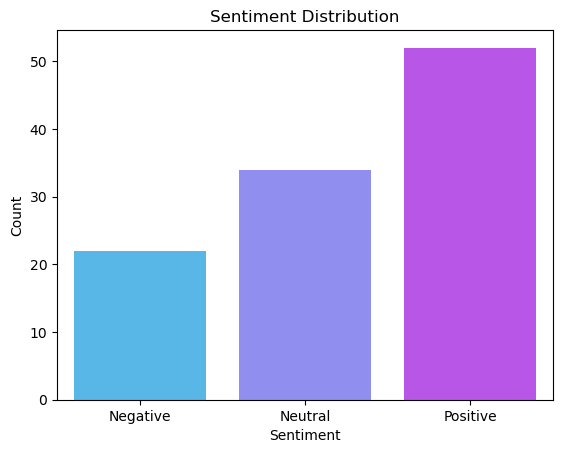

In [53]:
# Updated countplot
sns.countplot(data=df, x='Sentiment', palette='cool')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Preprocessing Quotes

In [57]:
import re

def preprocessing_text(text):
    #Basic text cleaning
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters
    text = text.lower().strip()
    return text

df['cleaned_quotes'] = df['quote'].apply(preprocessing_text)

Explore removing Stopwords to see the impact on the model performance at the end

In [58]:
from sklearn.model_selection import train_test_split
df['cleaned_quotes']

0              pain is inevitable but misery is optional
1      to avoid criticism do nothing say nothing be n...
2       believe and act as if it were impossible to fail
3      never get out of the boat absolutely goddamn r...
4      nobody can make you feel inferior without your...
                             ...                        
103        dont wish it were easier wish you were better
104    out yonder there was this huge world which exi...
105    life is beautiful so long as it is consuming y...
106    i offer you peace i offer you love i offer you...
107    when we are mindful deeply in touch with the p...
Name: cleaned_quotes, Length: 108, dtype: object

In [60]:
X = df['cleaned_quotes']  # Feature: cleaned quotes
y = df['Sentiment']      # Target: sentiment labels


In [61]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))

Training Set Size: 86
Testing Set Size: 22


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [64]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [65]:
from sklearn.ensemble import RandomForestClassifier


In [66]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

In [67]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5454545454545454
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         6
     Neutral       0.20      0.25      0.22         4
    Positive       0.65      0.92      0.76        12

    accuracy                           0.55        22
   macro avg       0.28      0.39      0.33        22
weighted avg       0.39      0.55      0.45        22



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 2nd Retry
Doing it again with a new and much bigger dataset, and we'll also add the sentiments and see how it works out if that improves the model

In [110]:
#load the quotes stash
big_quotes = pd.read_csv('data/balanced_quotes.csv')
# quotes = quotes[['quote','author']]
print(big_quotes.shape)

#since the file has over 500k data, we'll subset it into 20k
# Assuming you have a large DataFrame named 'df'
# big_quotes_subset = big_quotes.head(20000)
big_quotes_subset = big_quotes.head(5000)

big_quotes_subset.head()

(60000, 4)


,quote,author,category,sentiment
0,Make a spurious division of one process into t...,"Alan W. Watts, The Book on the Taboo Against K...",philosophy,Negative
1,Yielding to God's will can be hard. And someti...,"John M. Perkins, Let Justice Roll Down","christian, christianity, faith, missions",Positive
2,Normal is an illusion. What is normal for the ...,Charles Addams,"humor, life, morticia-addams",Negative
3,I maintain that the cosmic religious feeling i...,"Albert Einstein, The World As I See It","religion, science",Positive
4,The issue of false consciousness is a genuinel...,"Ha-Joon Chang, Economics: The User's Guide","economics, economy, false-consciousness, happi...",Positive


In [113]:
# Create a copy of the original DataFrame
big_quotes_subset_copy = big_quotes_subset.copy()
big_quotes_subset_copy.to_csv('big_quotes_subset.csv', index=False)

big_quotes_subset_copy = pd.read_csv('data/big_quotes_subset.csv')

In [115]:
big_quotes_subset_copy.describe()

,quote,author,category,Sentiment
count,5000,4998,5000,5000
unique,5000,2437,3589,3
top,"I'm selfish, impatient and a little insecure. ...","Roy T. Bennett, The Light in the Heart",love,Positive
freq,1,151,558,3090


In [116]:
big_quotes_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   quote      5000 non-null   object
 1   author     4998 non-null   object
 2   category   5000 non-null   object
 3   Sentiment  5000 non-null   object
dtypes: object(4)
memory usage: 156.4+ KB


In [117]:
##Adding the sentiment
big_quotes_subset['Sentiment'] = big_quotes_subset['quote'].apply(get_sentiment_label)



In [93]:
big_quotes_subset.describe()

,quote,author,category,Sentiment
count,5000,4998,5000,5000
unique,5000,2437,3589,3
top,"I'm selfish, impatient and a little insecure. ...","Roy T. Bennett, The Light in the Heart",love,Positive
freq,1,151,558,3090


In [94]:
big_quotes_subset['cleaned_quotes'] = big_quotes_subset['quote'].apply(preprocessing_text)

In [95]:
big_quotes_subset['cleaned_quotes']

0       im selfish impatient and a little insecure i m...
1       youve gotta dance like theres nobody watchingl...
2       you know youre in love when you cant fall asle...
3       a friend is someone who knows all about you an...
4       darkness cannot drive out darkness only light ...
                              ...                        
4995    do good live in the most positive and joyful w...
4996                                  what am i dying for
4997    until you change how you get things done youll...
4998    end no the journey doesnt end here death is ju...
4999    it is a fine thing to establish ones own relig...
Name: cleaned_quotes, Length: 5000, dtype: object

In [97]:
X_data = big_quotes_subset['cleaned_quotes']  # Feature: cleaned quotes
y_label = big_quotes_subset['Sentiment']      # Target: sentiment labels

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=42)


In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [100]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Test the model
y_pred = model.predict(X_test_tfidf)

In [101]:
from sklearn.metrics import classification_report, accuracy_score

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.704
              precision    recall  f1-score   support

    Negative       0.65      0.38      0.48       250
     Neutral       0.86      0.15      0.25       122
    Positive       0.71      0.94      0.81       628

    accuracy                           0.70      1000
   macro avg       0.74      0.49      0.51      1000
weighted avg       0.71      0.70      0.66      1000



## 3rd Retry

In [118]:
#load the quotes stash
bigquotes = pd.read_csv('data/balanced_quotes.csv')
# quotes = quotes[['quote','author']]
print(bigquotes.shape)


(60000, 4)


In [125]:
bigquotes = bigquotes.dropna(subset=['author'])
bigquotes = bigquotes.dropna(subset=['category'])

In [126]:
bigquotes.describe()

,quote,author,category,sentiment
count,59979,59979,59979,59979
unique,31819,13774,22923,3
top,A story is a letter that the author writes to ...,Debasish Mridha,writing,Negative
freq,10,1159,1008,19994


In [124]:
bigquotes.describe()

,quote,author,category,sentiment
count,59982,59982,59979,59982
unique,31820,13775,22923,3
top,A story is a letter that the author writes to ...,Debasish Mridha,writing,Negative
freq,10,1159,1008,19994


In [130]:
print(bigquotes.isnull().sum())
print(len(bigquotes['quote']), len(bigquotes['sentiment']), len(bigquotes['author']))


quote        0
author       0
category     0
sentiment    0
dtype: int64
59979 59979 59979


In [131]:
bigquotes.describe()

,quote,author,category,sentiment
count,59979,59979,59979,59979
unique,31819,13774,22923,3
top,A story is a letter that the author writes to ...,Debasish Mridha,writing,Negative
freq,10,1159,1008,19994


In [137]:
# Check for duplicate quotes
duplicates = bigquotes[bigquotes.duplicated(subset=['quote'])]
print(f"Number of duplicate quotes: {len(duplicates)}")

Number of duplicate quotes: 28160


In [139]:
# Drop duplicates based on the 'quote' column
bigquotes_unique = bigquotes.drop_duplicates(subset=['quote'])
print(f"Number of unique quotes after removing duplicates: {len(bigquotes_unique)}")


Number of unique quotes after removing duplicates: 31819


In [140]:
bigquotes_unique.describe()

,quote,author,category,sentiment
count,31819,31819,31819,31819
unique,31819,13774,22923,3
top,Make a spurious division of one process into t...,Debasish Mridha,inspirational,Positive
freq,1,656,496,14383


In [141]:
#bigquotes = bigquotes[bigquotes['sentiment'] != 'Neutral']  # Filter the full dataset
# X = df[['feature1', 'feature2']]
# y = df['sentiment']

X_data_2 = bigquotes_unique['quote']  # Feature: cleaned quotes
y_label_2 = bigquotes_unique['sentiment']      # Target: sentiment labels


In [142]:
print(len(X_data_2))  # For example, your feature data (quotes, cleaned_quotes, etc.)
print(len(y_label_2))  # For example, your target variable (sentiments)


31819
31819


In [143]:

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_2, y_label_2, test_size=0.2, random_state=42)


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [145]:
from sklearn.metrics import classification_report, accuracy_score

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [6364, 1000]